In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Reading all files

In [2]:
pd.set_option('max_columns', None)

In [3]:
cities = pd.read_csv("Data_stage1/Cities.csv", encoding = "utf-8")
conference = pd.read_csv("Data_stage1/Conferences.csv", encoding = "utf-8")
game_city = pd.read_csv("Data_stage1/WGameCities.csv", encoding = "utf-8")
NCAATourneyCompactResults = pd.read_csv("Data_stage1/WNCAATourneyCompactResults.csv", encoding = "utf-8")
NCAATourneyDetailedResults = pd.read_csv("Data_stage1/WNCAATourneyDetailedResults.csv", encoding = "utf-8")
NCAATourneySeeds = pd.read_csv("Data_stage1/WNCAATourneySeeds.csv", encoding = "utf-8")
NCAATourneySlots = pd.read_csv("Data_stage1/WNCAATourneySlots.csv", encoding = "utf-8")
RegularSeasonCompactResults = pd.read_csv("Data_stage1/WRegularSeasonCompactResults.csv", encoding = "utf-8")
RegularSeasonDetailedResults = pd.read_csv("Data_stage1/WRegularSeasonDetailedResults.csv", encoding = "utf-8")
sub_stage1 = pd.read_csv("Data_stage1/WSampleSubmissionStage1.csv", encoding = "utf-8")
seasons = pd.read_csv("Data_stage1/WSeasons.csv", encoding = "utf-8")
TeamConferences = pd.read_csv("Data_stage1/WTeamConferences.csv", encoding = "utf-8")
teams = pd.read_csv("Data_stage1/WTeams.csv", encoding = "utf-8")
TeamSpellings = pd.read_csv("Data_stage1/WTeamSpellings.csv", encoding = "cp1252")

# Looking all data files one by one

# Cities

In [4]:
cities.head()

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA


In [5]:
print("the shape of the data file ---->",cities.shape)
print("Number of cities and states in the data file --->", cities.nunique())

the shape of the data file ----> (463, 3)
Number of cities and states in the data file ---> CityID    463
City      435
State      63
dtype: int64


<AxesSubplot:xlabel='State', ylabel='City'>

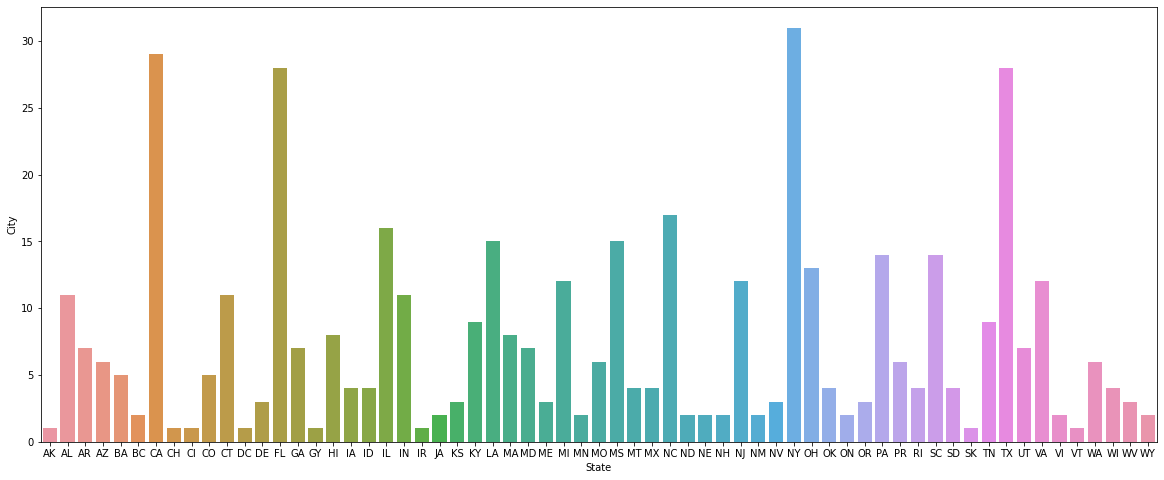

In [6]:
# plot how many cities in each state
plt.figure(figsize=(20,8))
state_wise = cities.groupby("State")["City"].count().reset_index()
sns.barplot(data=state_wise, x="State", y="City")


# Conference

**ConfAbbrev** -- small abbrevation of the conference 
**Description** -- Conference name

In [7]:
conference.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [8]:
print("Number of conferneces happended based on conference description--->", conference["Description"].nunique())
print("Number of conferneces happended based on conference abbrevation--->", conference["ConfAbbrev"].nunique())

Number of conferneces happended based on conference description---> 51
Number of conferneces happended based on conference abbrevation---> 51


# Game city

**Season** - this is the year of the associated entry in WSeasons.csv (the year in which the final tournament occurs). For example, during the 2016 season, there were regular season games played between November 2015 and March 2016, and all of those games will show up with a Season of 2016. <br>
**DayNum** - this integer always ranges from 0 to 132, and tells you what day the game was played on. It represents an offset from the "DayZero" date in the "WSeasons.csv" file. For example, the first game in the file was DayNum=18. Combined with the fact from the "WSeasons.csv" file that day zero was 10/27/1997 that year, this means the first game was played 18 days later, or 11/14/1997. There are no teams that ever played more than one game on a given date, so you can use this fact if you need a unique key (combining Season and DayNum and WTeamID).<br>
**WTeamID** - this identifies the id number of the team that won the game, as listed in the "WTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team.<br>

**LTeamID** - this identifies the id number of the team that lost the game.<br>
**CRType** - this can be either Regular or NCAA or Secondary. If it is Regular, you can find more about the game in the MRegularSeasonCompactResults.csv and MRegularSeasonDetailedResults.csv files. If it is NCAA, you can find more about the game in the MNCAATourneyCompactResults.csv and MNCAATourneyDetailedResults.csv files. If it is Secondary, you can find more about the game in the MSecondaryTourneyCompactResults file.<br>
**CityID** - the ID of the city where the game was played, as specified by the CityID column in the Cities.csv file.

In [9]:
game_city.head()

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,11,3103,3237,Regular,4002
1,2010,11,3104,3399,Regular,4085
2,2010,11,3110,3224,Regular,4363
3,2010,11,3111,3267,Regular,4158
4,2010,11,3119,3447,Regular,4367


<AxesSubplot:xlabel='count', ylabel='CRType'>

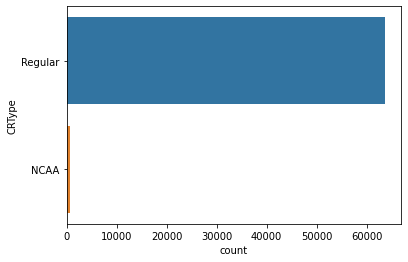

In [10]:
# count the CRType feature
sns.countplot(data=game_city, y="CRType")

,2019,2014,2017,2018,2015,2016,2013,2020,2011,2012,2010,2021,2022
Season,5303,5286,5259,5254,5250,5246,5206,5171,5144,5100,5097,3619,3538


<AxesSubplot:xlabel='Season', ylabel='count'>

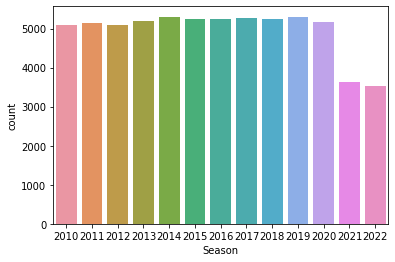

In [11]:
# plot the season count
display(pd.DataFrame(game_city["Season"].value_counts()).T)
sns.countplot(data=game_city, x="Season")

Number of winning teams 358


<AxesSubplot:xlabel='WTeamID', ylabel='count'>

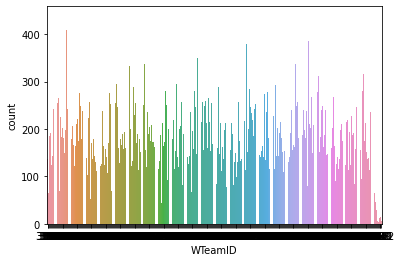

In [12]:
# which team wins more
print("Number of winning teams",game_city["WTeamID"].nunique())
sns.countplot(data=game_city, x="WTeamID")

# Seasons

This file identifies the different seasons included in the historical data, along with certain season-level properties.

**Season** - indicates the year in which the tournament was played. Remember that the current season counts as 2022.<br>
**DayZero** - tells you the date corresponding to DayNum=0 during that season. All game dates have been aligned upon a common scale so that (each year) Selection Monday is on day 133. All game data includes the day number in order to make it easier to perform date calculations. If you need to know the exact date a game was played on, you can combine the game's "DayNum" with the season's "DayZero". For instance, since day zero during the 2011-2012 season was 10/31/2011, if we know that the earliest regular season games that year were played on DayNum=7, they were therefore played on 11/07/2011.<br>
**RegionW, RegionX, Region Y, Region Z** - by convention, the four regions in the final tournament are always named W, X, Y, and Z. Whichever region's name comes first alphabetically, that region will be Region W. And whichever Region plays against Region W in the national semifinals, that will be Region X. For the other two regions, whichever region's name comes first alphabetically, that region will be Region Y, and the other will be Region Z. This allows us to identify the regions and brackets in a standardized way in other files. For instance, during the 2012 tournament, the four regions were DesMoines, Fresno, Kingston, and Raleigh. Being the first alphabetically, DesMoines becomes W. Since the Fresno regional champion (Stanford) played against the DesMoines regional champion (Baylor) in the national semifinals, that makes Fresno be region X. For the other two (Kingston and Raleigh), since Kingston comes first alphabetically, that makes Kingston Y and therefore Raleigh is Z. So for that season, the W/X/Y/Z are DesMoines,Fresno,Kingston,Raleigh. And so for instance, Baylor, the #1 seed in the DesMoines region, is listed in the WNCAATourneySeeds file with a seed of W01, meaning they were the #1 seed in the W region (the DesMoines region). We will not know the final W/X/Y/Z designations until Selection Monday, because the national semifinal pairings in the Final Four will depend upon the overall ranks of the four #1 seeds.
<br><br>
The game dates in this dataset are expressed in relative terms, as the number of days since the start of the regular season, and aligned for each season so that day number #133 is the Monday right before the tournament, when team selections are made. During any given season, day number zero is defined to be exactly 19 weeks earlier than Selection Monday, so Day #0 is a Monday in late October or early November such that Day #132 is Selection Sunday (for the men's tournament) and Day #133 is Selection Monday (for the women's tournament).
<br><br>
This doesn't necessarily mean that the regular season will always start exactly on day #0 or day #1; in fact, during the past decade, regular season games typically start being played on a Friday that is either Day #4 or Day #11, but further back there was more variety.



In [13]:
print("Shape of the data file", seasons.shape)
seasons.head(25)


Shape of the data file (25, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,1997-10-27 00:00:00,East,Midwest,Mideast,West
1,1999,1998-10-26 00:00:00,East,Mideast,Midwest,West
2,2000,1999-11-01 00:00:00,East,Midwest,Mideast,West
3,2001,2000-10-30 00:00:00,East,Midwest,Mideast,West
4,2002,2001-10-29 00:00:00,East,West,Mideast,Midwest
5,2003,2002-11-04 00:00:00,East,West,Mideast,Midwest
6,2004,2003-11-03 00:00:00,East,Mideast,Midwest,West
7,2005,2004-11-01 00:00:00,Chattanooga,Tempe,KansasCity,Philadelphia
8,2006,2005-10-31 00:00:00,Albuquerque,Cleveland,Bridgeport,San Antonio
9,2007,2006-10-30 00:00:00,Dallas,Dayton,Fresno,Greensboro


In [14]:
# see how many regions are there
regions = []
regi_col = ["RegionW", "RegionX", "RegionY", "RegionZ"]
for r in regi_col:
    for region_name in seasons.loc[:,r].values:
        regions.append(region_name)
print("How many unique regions are partipating in this game from 1998 - 2022 ---->", pd.Series(regions).nunique())

How many unique regions are partipating in this game from 1998 - 2022 ----> 46


In [15]:
# what are the region names
set(regions)

{'Alamo',
 'Albany',
 'Albuquerque',
 'Berkeley',
 'Bridgeport',
 'Chattanooga',
 'Chicago',
 'Cleveland',
 'Dallas',
 'Dayton',
 'DesMoines',
 'East',
 'Fresno',
 'Greensboro',
 'Hemisfair',
 'KansasCity',
 'Kingston',
 'Lexington',
 'Lincoln',
 'Louisville',
 'Memphis',
 'Mercado',
 'Mideast',
 'Midwest',
 'NA1',
 'NA2',
 'NA3',
 'NA4',
 'NewOrleans',
 'Norfolk',
 'NotreDame',
 'OklahomaCity',
 'Philadelphia',
 'Portland',
 'Raleigh',
 'RiverWalk',
 'Sacramento',
 'San Antonio',
 'SiouxFalls',
 'Spokane',
 'Stanford',
 'Stockton',
 'TBD',
 'Tempe',
 'Trenton',
 'West'}

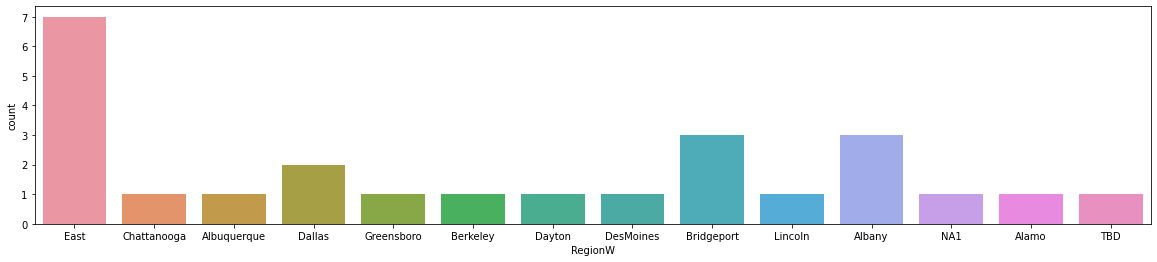

In [16]:
# RegionW -- plot
fig = plt.figure(figsize=(20, 4))
sns.countplot(data=seasons, x='RegionW');
plt.show()

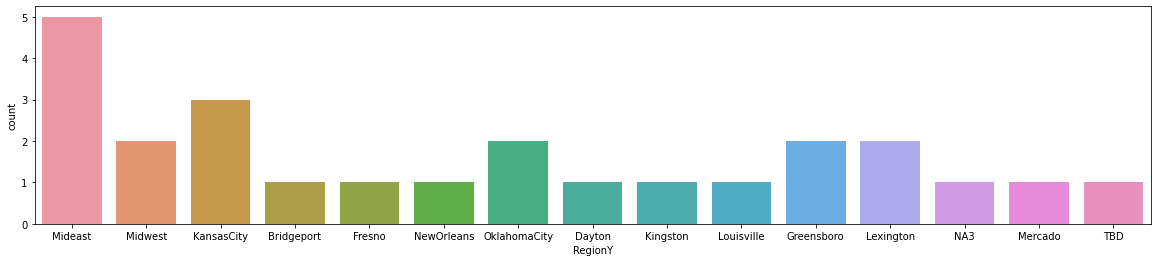

In [17]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(data=seasons, x='RegionY');
plt.show()

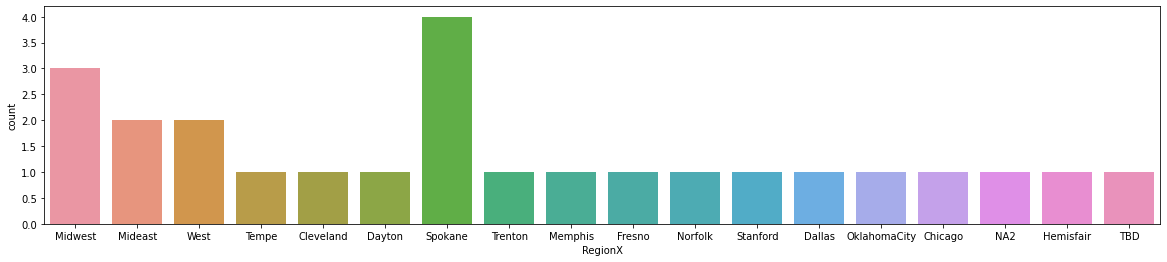

In [18]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(data=seasons, x='RegionX');
plt.show()

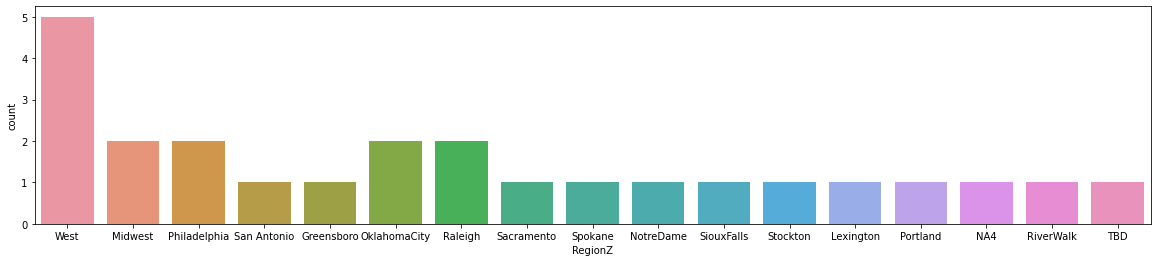

In [19]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(data=seasons, x='RegionZ');
plt.show()

# Team Conferences

In [20]:

print("Shape of the data file --->",TeamConferences.shape)
TeamConferences.head()

Shape of the data file ---> (8407, 3)


,Season,TeamID,ConfAbbrev
0,1998,3102,wac
1,1998,3103,mac
2,1998,3104,sec
3,1998,3106,swac
4,1998,3108,swac


In [21]:
print("How many team conferences were happend -->",TeamConferences["ConfAbbrev"].nunique())

How many team conferences were happend --> 37


,2022,2020,2019,2015,2018,2014,2017,2016,2013,2021,2010,2009,2011,2012,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998
Season,356,351,351,349,349,349,349,349,345,345,344,343,343,342,338,335,332,328,324,323,323,316,315,309,299


<AxesSubplot:title={'center':'How many conferences are happening per year'}, xlabel='Season', ylabel='count'>

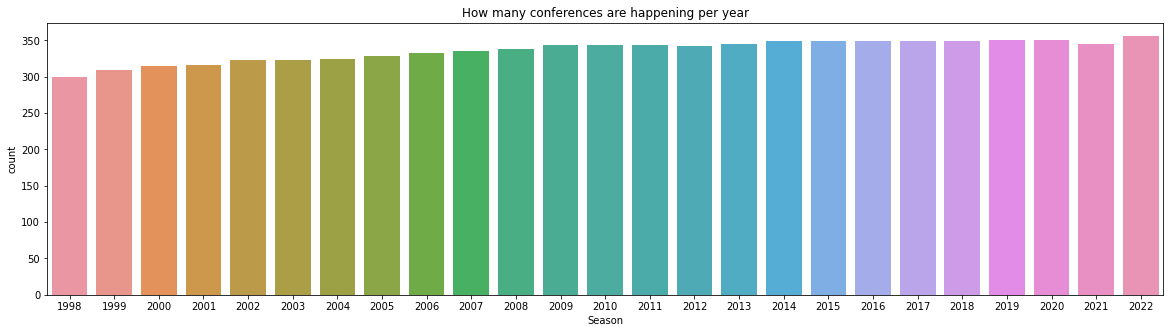

In [22]:
# plot the count of team conferences according to a year
display(pd.DataFrame(TeamConferences.Season.value_counts()).T)
plt.figure(figsize=(20,5))
plt.title("How many conferences are happening per year")
sns.countplot(data=TeamConferences, x="Season")

# Teams

**TeamID** - a 4 digit id number, from 1000-1999, uniquely identifying each NCAA® men's team. A school's TeamID does not change from one year to the next, so for instance the Duke men's TeamID is 1181 for all seasons. To avoid possible confusion between the men's data and the women's data, all of the men's team ID's range from 1000-1999, whereas all of the women's team ID's range from 3000-3999.<br>
**TeamName** - a compact spelling of the team's college name, 16 characters or fewer. There are no commas or double-quotes in the team names, but you will see some characters that are not letters or spaces, e.g., Texas A&M, St Mary's CA, TAM C. Christi, and Bethune-Cookman.

In [23]:
print("Number of teams in the compatition --->",teams.shape[0])
teams.head()

Number of teams in the compatition ---> 370


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


# Team Spelling file

This file indicates alternative spellings of many team names. It is intended for use in associating external spellings against our own TeamID numbers, thereby helping to relate the external data properly with our datasets. Over the years we have identified various external spellings of different team names (as an example, for Ball State we have seen "ball st", and "ball st.", and "ball state", and "ball-st", and "ball-state"). Other teams have had more significant changes to their names over the years; for example, "Texas Pan-American" and "Texas-Rio Grande Valley" are actually the same school. The current list is obviously not exhaustive, and we encourage participants to identify additional mappings and upload extended versions of this file to the forums.

**TeamNameSpelling** - this is the spelling of the team name. It is always expressed in all lowercase letters - e.g. "ball state" rather than "Ball State" - in order to emphasize that any comparisons should be case-insensitive when matching.<br>
**TeamID** - this identifies the TeamID for the team that has the alternative spelling (as described in MTeams.csv).

In [24]:
print("Shape of the data file --->",TeamSpellings.shape)
TeamSpellings.head()

Shape of the data file ---> (1150, 2)


,TeamNameSpelling,TeamID
0,a&m-corpus chris,3394
1,a&m-corpus christi,3394
2,abilene chr,3101
3,abilene christian,3101
4,abilene-christian,3101


In [25]:
print("How many teams are there ---->",TeamSpellings.TeamID.nunique())

How many teams are there ----> 370


<AxesSubplot:xlabel='TeamID', ylabel='count'>

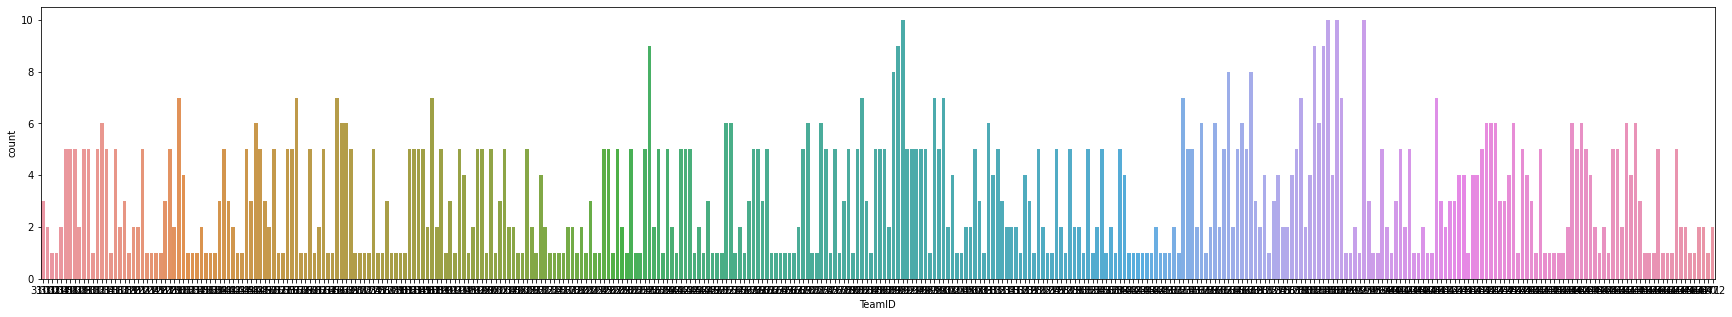

In [26]:
# How many different spellings are there for a team
plt.figure(figsize=(30,5))
sns.countplot(data=TeamSpellings, x="TeamID")

# NCCA Tournament Seeds

This file identifies the seeds for all teams in each NCAA® tournament, for all seasons of historical data. Thus, there are between 64-68 rows for each year, depending on whether there were any play-in games and how many there were. In recent years the structure has settled at 68 total teams, with four "play-in" games leading to the final field of 64 teams entering Round 1 on Thursday of the first week (by definition, that is DayNum=136 each season). We will not know the seeds of the respective tournament teams, or even exactly which 68 teams it will be, until Selection Sunday on March 13, 2022 (DayNum=132).

**Season** - the year that the tournament was played in <br>
**Seed** - this is a 3/4-character identifier of the seed, where the first character is either W, X, Y, or Z (identifying the region the team was in) and the next two digits (either 01, 02, ..., 15, or 16) tell you the seed within the region. For play-in teams, there is a fourth character (a or b) to further distinguish the seeds, since teams that face each other in the play-in games will have seeds with the same first three characters. The "a" and "b" are assigned based on which Team ID is lower numerically. As an example of the format of the seed, the first record in the file is seed W01 from 1985, which means we are looking at the #1 seed in the W region (which we can see from the "MSeasons.csv" file was the East region).<br>
TeamID - this identifies the id number of the team, as specified in the MTeams.csv file

In [27]:
print("Shape of the data file --->",NCAATourneySeeds.shape)
NCAATourneySeeds.head()

Shape of the data file ---> (1472, 3)


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


In [28]:
print("Total Seasons -- >",(NCAATourneySeeds.Season.nunique()))
print("Seeds Count -->",(NCAATourneySeeds.Seed.nunique()))
print("Unique TeamID -->",(NCAATourneySeeds.TeamID.nunique()))

Total Seasons -- > 23
Seeds Count --> 64
Unique TeamID --> 263


In [29]:
NCAATourneySeeds.Seed.value_counts() # which means One seed for every year - like seed W01 will be there for all 23 years

Y07    23
Y05    23
Z10    23
Z16    23
Y11    23
       ..
W01    23
Z05    23
Z06    23
Z08    23
X07    23
Name: Seed, Length: 64, dtype: int64

# NCCA Tournament Slots

This file identifies the mechanism by which teams are paired against each other, depending upon their seeds, as the tournament proceeds through its rounds. It can be of use in identifying, for a given historical game, what round it occurred in, and what the seeds/slots were for the two teams (the meaning of "slots" is described below). Because of the existence of play-in games for particular seed numbers, the pairings have small differences from year to year. You may need to know these specifics if you are trying to represent/simulate the exact workings of the tournament bracket.

**Season** - this is the year of the associated entry in MSeasons.csv (the year in which the final tournament occurs)
Slot - this uniquely identifies one of the tournament games. For play-in games, it is a three-character string identifying the seed fulfilled by the winning team, such as W16 or Z13. For regular tournament games, it is a four-character string, where the first two characters tell you which round the game is (R1, R2, R3, R4, R5, or R6) and the second two characters tell you the expected seed of the favored team. Thus the first row is R1W1, identifying the Round 1 game played in the W bracket, where the favored team is the 1 seed. As a further example, the R2W1 slot indicates the Round 2 game that would have the 1 seed from the W bracket, assuming that all favored teams have won up to that point. Even if that R2W1 slot were actually a game between the W09 and W16 teams, it is still considered to be the R2W1 slot. The slot names are different for the final two rounds, where R5WX identifies the national semifinal game between the winners of regions W and X, and R5YZ identifies the national semifinal game between the winners of regions Y and Z, and R6CH identifies the championship game. The "slot" value is used in other columns in order to represent the advancement and pairings of winners of previous games.<br><br>
**StrongSeed** - this indicates the expected stronger-seeded team that plays in this game. For Round 1 games, a team seed is identified in this column (as listed in the "Seed" column in the MNCAATourneySeeds.csv file), whereas for subsequent games, a slot is identified in this column. In the first record of this file (slot R1W1), we see that seed W01 is the "StrongSeed", which during the 1985 tournament would have been Georgetown. Whereas for games from Round 2 or later, rather than a team seed, we will see a "slot" referenced in this column. So in the 33rd record of this file (slot R2W1), it tells us that the winners of slots R1W1 and R1W8 will face each other in Round 2. Of course, in the last few games of the tournament - the national semifinals and finals - it's not really meaningful to talk about a "strong seed" or "weak seed", since you would have #1 seeds favored to face each other, but those games are nevertheless represented in the same format for the sake of consistency.<br><br>
**WeakSeed** - this indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far. For Round 1 games, a team seed is identified in this column (as listed in the "Seed" column in the MNCAATourneySeeds.csv file), whereas for subsequent games, a slot is identified in this column.<br><br>

In [30]:
print("Shape of the data file --->",NCAATourneySlots.shape)
NCAATourneySlots.head()

Shape of the data file ---> (63, 3)


,Slot,StrongSeed,WeakSeed
0,R1W1,W01,W16
1,R1W2,W02,W15
2,R1W3,W03,W14
3,R1W4,W04,W13
4,R1W5,W05,W12


# NCAA Tournament Compact Results

This file identifies the game-by-game NCAA® tournament results for all seasons of historical data. The data is formatted exactly like the WRegularSeasonCompactResults data. Each season you will see 63 games listed, since there are no women's play-in games.

Although the scheduling of the men's tournament rounds has been consistent for many years, there has been more variety in the scheduling of the women's rounds. 

**Season** - this is the year of the associated entry in WSeasons.csv (the year in which the final tournament occurs). For example, during the 2016 season, there were regular season games played between November 2015 and March 2016, and all of those games will show up with a Season of 2016.<br>
**DayNum** - this integer always ranges from 0 to 132, and tells you what day the game was played on. It represents an offset from the "DayZero" date in the "WSeasons.csv" file. For example, the first game in the file was DayNum=18. Combined with the fact from the "WSeasons.csv" file that day zero was 10/27/1997 that year, this means the first game was played 18 days later, or 11/14/1997. There are no teams that ever played more than one game on a given date, so you can use this fact if you need a unique key (combining Season and DayNum and WTeamID).<br>
**WTeamID** - this identifies the id number of the team that won the game, as listed in the "WTeams.csv" file. No matter whether the game was won by the home team or visiting team, or if it was a neutral-site game, the "WTeamID" always identifies the winning team.<br>
**WScore** - this identifies the number of points scored by the winning team.<br>
**LTeamID** - this identifies the id number of the team that lost the game.<br>
**LScore** - this identifies the number of points scored by the losing team. Thus you can be confident that WScore will be greater than LScore for all games listed.<br>
**NumOT** - this indicates the number of overtime periods in the game, an integer 0 or higher.<br>
**WLoc** - this identifies the "location" of the winning team. If the winning team was the home team, this value will be "H". If the winning team was the visiting team, this value will be "A". If it was played on a neutral court, then this value will be "N". Sometimes it is unclear whether the site should be considered neutral, since it is near one team's home court, or even on their court during a tournament, but for this determination we have simply used the Kenneth Massey data in its current state, where the "@" sign is either listed with the winning team, the losing team, or neither team. If you would like to investigate this factor more closely, we invite you to explore Data Section 3, which provides the city that each game was played in, irrespective of whether it was considered to be a neutral site.

In [31]:
print("shape of the data --->",NCAATourneyCompactResults.shape)
NCAATourneyCompactResults.head()

shape of the data ---> (1449, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


<AxesSubplot:xlabel='points_diff', ylabel='count'>

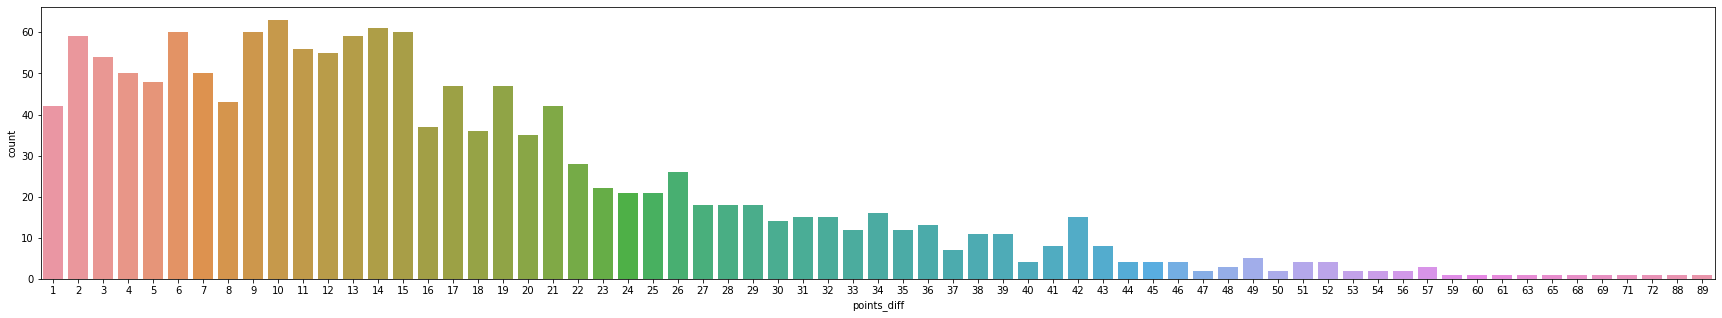

In [32]:
NCAATourneyCompactResults["points_diff"] = NCAATourneyCompactResults.WScore - NCAATourneyCompactResults.LScore
# plot the point difference
plt.figure(figsize=(30,5))
sns.countplot(data=NCAATourneyCompactResults, x="points_diff")

<AxesSubplot:xlabel='points_diff', ylabel='Count'>

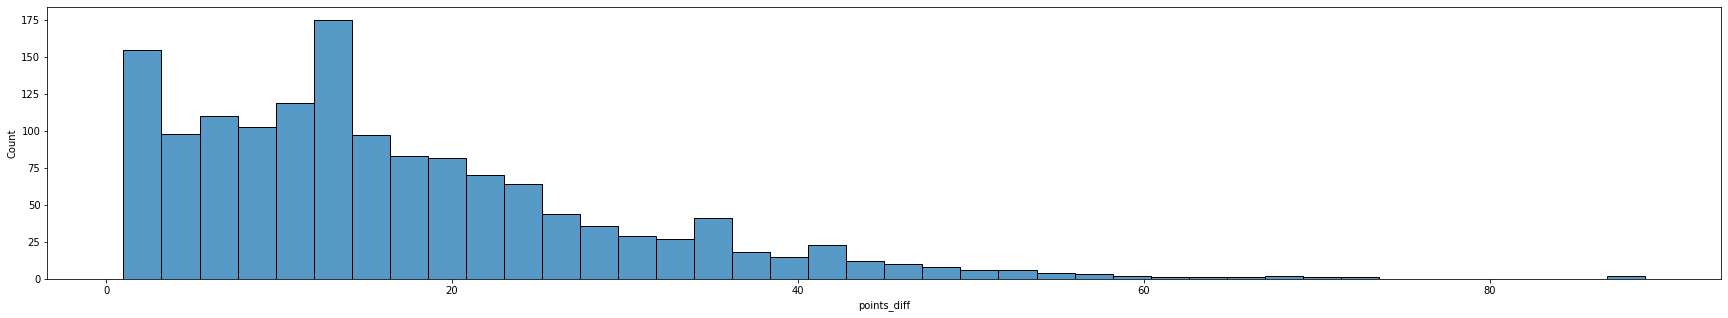

In [33]:
plt.figure(figsize=(30,5))
sns.histplot(data=NCAATourneyCompactResults, x="points_diff", bins=40)

In [34]:
summaries = NCAATourneyCompactResults[['Season', 
    'WScore', 
    'LScore', 
    'NumOT', 
    'points_diff']].groupby('Season').agg(['min', 'max', 'mean', 'median'])
summaries.columns = ["-".join(col) for col in summaries.columns.values]
summaries

,WScore-min,WScore-max,WScore-mean,WScore-median,LScore-min,LScore-max,LScore-mean,LScore-median,NumOT-min,NumOT-max,NumOT-mean,NumOT-median,points_diff-min,points_diff-max,points_diff-mean,points_diff-median
Season,,,,,,,,,,,,,,,,
1998,55,102,78.587302,77,39,80,63.396825,64,0,0,0.000000,0,1,53,15.190476,14
1999,53,113,76.444444,76,41,92,60.650794,61,0,0,0.000000,0,2,59,15.793651,13
2000,57,116,78.031746,77,38,85,61.634921,63,0,0,0.000000,0,1,71,16.396825,15
2001,51,104,79.444444,79,29,87,61.365079,63,0,0,0.000000,0,2,72,18.079365,15
2002,55,98,76.507937,76,35,79,59.111111,60,0,0,0.000000,0,1,49,17.396825,15
2003,50,95,72.507937,72,33,85,57.015873,57,0,0,0.000000,0,1,52,15.492063,13
2004,52,103,72.285714,71,42,85,57.952381,58,0,0,0.000000,0,1,52,14.333333,13
2005,58,97,73.126984,71,33,79,56.126984,57,0,0,0.000000,0,1,51,17.000000,12
2006,57,102,75.857143,75,27,75,59.920635,61,0,1,0.047619,0,2,69,15.936508,14


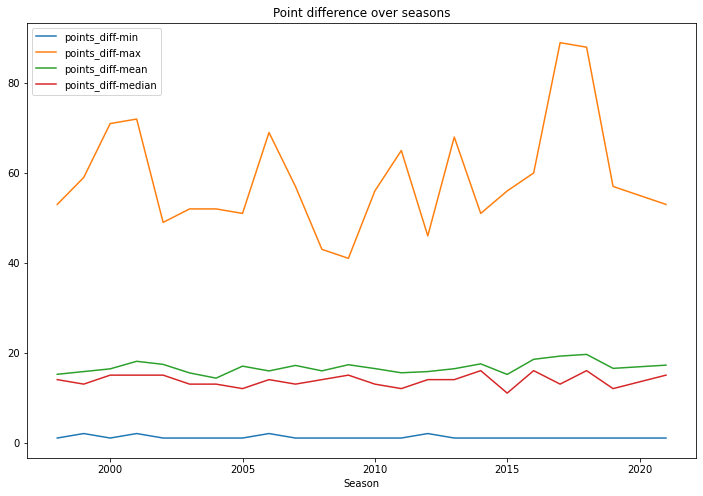

In [35]:
summaries[[col for col in summaries.columns if 'points_diff' in col]].plot(figsize=(12,8))
plt.title('Point difference over seasons')
plt.show()

# NCAA Tournament Detailed results

In [36]:
print("Shape of the data --->",NCAATourneyDetailedResults.shape)
NCAATourneyDetailedResults.head()

Shape of the data ---> (693, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12


# Submission

In [37]:
sub_stage1.head()

,ID,Pred
0,2016_3106_3107,0.5
1,2016_3106_3113,0.5
2,2016_3106_3119,0.5
3,2016_3106_3120,0.5
4,2016_3106_3124,0.5


# Generating training data

# Data preprocessing

following this youtube vedio to combine the files into single dataset. (not fully but following few steps) -- https://www.youtube.com/watch?v=KmhGNc7gcCM&t=18s&ab_channel=Kaggle

- WFGM - field goals made (by the winning team)
- WFGA - field goals attempted (by the winning team)
- WFGM3 - three pointers made (by the winning team)
- WFGA3 - three pointers attempted (by the winning team)
- WFTM - free throws made (by the winning team)
- WFTA - free throws attempted (by the winning team)
- WOR - offensive rebounds (pulled by the winning team)
- WDR - defensive rebounds (pulled by the winning team)
- WAst - assists (by the winning team)
- WTO - turnovers committed (by the winning team)
- WStl - steals (accomplished by the winning team)
- WBlk - blocks (accomplished by the winning team)
- WPF - personal fouls committed (by the winning team)

In [40]:
# read the data
ncaa_tournement_results = NCAATourneyDetailedResults.copy()
regular_results = RegularSeasonDetailedResults.copy()

# get the shapes
print("NCAA tournement detailed result shape --->",ncaa_tournement_results.shape)
display(ncaa_tournement_results.head())

print("Regular match detailed results shape --->",regular_results.shape)
display(regular_results.head())

NCAA tournement detailed result shape ---> (693, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12


Regular match detailed results shape ---> (63887, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14


In [41]:
# basic feature engineering 
regular_results['WEFFG'] = regular_results['WFGM'] / regular_results['WFGA']
regular_results['WEFFG3'] = regular_results['WFGM3'] / regular_results['WFGA3']
regular_results['WDARE'] = regular_results['WFGM3'] / regular_results['WFGM']
regular_results['WTOQUETOQUE'] = regular_results['WAst'] / regular_results['WFGM']

regular_results['LEFFG'] = regular_results['LFGM'] / regular_results['LFGA']
regular_results['LEFFG3'] = regular_results['LFGM3'] / regular_results['LFGA3']
regular_results['LDARE'] = regular_results['LFGM3'] / regular_results['LFGM']
regular_results['LTOQUETOQUE'] = regular_results['LAst'] / regular_results['LFGM']


# doing in the tournament data
ncaa_tournement_results['WEFFG'] = ncaa_tournement_results['WFGM'] / ncaa_tournement_results['WFGA']
ncaa_tournement_results['WEFFG3'] = ncaa_tournement_results['WFGM3'] / ncaa_tournement_results['WFGA3']
ncaa_tournement_results['WDARE'] = ncaa_tournement_results['WFGM3'] / ncaa_tournement_results['WFGM']
ncaa_tournement_results['WTOQUETOQUE'] = ncaa_tournement_results['WAst'] / ncaa_tournement_results['WFGM']

ncaa_tournement_results['LEFFG'] = ncaa_tournement_results['LFGM'] / ncaa_tournement_results['LFGA']
ncaa_tournement_results['LEFFG3'] = ncaa_tournement_results['LFGM3'] / ncaa_tournement_results['LFGA3']
ncaa_tournement_results['LDARE'] = ncaa_tournement_results['LFGM3'] / ncaa_tournement_results['LFGM']
ncaa_tournement_results['LTOQUETOQUE'] = ncaa_tournement_results['LAst'] / ncaa_tournement_results['LFGM']

In [42]:
print("NCAA tournement detailed result shape --->",ncaa_tournement_results.shape)
print("Regular match detailed results shape --->",regular_results.shape)

NCAA tournement detailed result shape ---> (693, 42)
Regular match detailed results shape ---> (63887, 42)


In [48]:
# very few samples in the tournament results data -- need to get some more data here -- we can use one of the data agumentation techique we use in CNN image classification here -- not exactly like that 
# but like that we are gonna to swap the winning team and lossing team statistics and gonna double the size of the sample -- useful method to do here

def generate_samples(data):
    # gonna swap winning team and lossing team statistics
    dataswap = data[['Season', 'DayNum', 'LTeamID', 'LScore', 'WTeamID', 'WScore', 'WLoc', 'NumOT', 
    'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 
    'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]

    # change the location
    dataswap.loc[data['WLoc'] == 'H', 'WLoc'] = 'A'
    dataswap.loc[data['WLoc'] == 'A', 'WLoc'] = 'H'
    data.columns.values[6] = 'location'
    dataswap.columns.values[6] = 'location'

    # chnage the column names --> w --> T1 and L --> T2 in first dataframe
    # change the column names --> L --> T1 and w --> T1 in seconda dataframe
    data.columns = [col.replace('W','T1_').replace('L','T2_') for col in list(data.columns)]
    dataswap.columns = [col.replace('L','T1_').replace('W','T2_') for col in list(dataswap.columns)]

    total_data = pd.concat([data, dataswap]).reset_index(drop=True)

    # change the location to numerical values
    total_data.loc[total_data.location=='N','location'] = '0'
    total_data.loc[total_data.location=='H','location'] = '1'
    total_data.loc[total_data.location=='A','location'] = '-1'
    total_data.location = total_data.location.astype(int)
    
    # compute the point difference
    total_data["point_diff"] = total_data['T1_Score'] - total_data['T2_Score']
    return total_data

regular_results = generate_samples(regular_results)
ncaa_tournement_results = generate_samples(ncaa_tournement_results)


/home/pavithra/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/pavithra/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
# get the shapes
print("NCAA tournement detailed result shape --->",ncaa_tournement_results.shape)
display(ncaa_tournement_results.head())

print("Regular match detailed results shape --->",regular_results.shape)
display(regular_results.head())

NCAA tournement detailed result shape ---> (1386, 43)


,Season,DayNum,T1_TeamID,T1_Score,T2_TeamID,T2_Score,location,NumOT,T1_FGM,T1_FGA,T1_FGM3,T1_FGA3,T1_FTM,T1_FTA,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,T2_FGM,T2_FGA,T2_FGM3,T2_FGA3,T2_FTM,T2_FTA,T2_OR,T2_DR,T2_Ast,T2_TO,T2_Stl,T2_Blk,T2_PF,T1_EFFG,T1_EFFG3,T1_DARE,T1_TOQUETOQUE,T2_EFFG,T2_EFFG3,T2_DARE,T2_TOQUETOQUE,point_diff
0,2010,138,3124,69,3201,55,0,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18,0.491228,0.200000,0.035714,0.785714,0.344262,0.294118,0.476190,0.571429,14
1,2010,138,3173,67,3395,66,0,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22,0.389831,0.346154,0.391304,0.565217,0.301370,0.296296,0.363636,0.363636,1
2,2010,138,3181,72,3214,37,1,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20,0.456140,0.307692,0.153846,0.576923,0.267857,0.266667,0.266667,0.266667,35
3,2010,138,3199,75,3256,61,1,0,25,63,3,15,22,26,20,27,13,17,8,3,21,21,62,2,20,17,22,16,21,13,16,5,4,24,0.396825,0.200000,0.120000,0.520000,0.338710,0.100000,0.095238,0.619048,14
4,2010,138,3207,62,3265,42,0,0,24,68,8,25,6,8,20,29,16,8,5,5,18,13,60,5,26,11,17,16,22,9,10,3,4,12,0.352941,0.320000,0.333333,0.666667,0.216667,0.192308,0.384615,0.692308,20


Regular match detailed results shape ---> (127774, 44)


,Season,DayNum,T1_TeamID,T1_Score,T2_TeamID,T2_Score,location,NumOT,T1_FGM,T1_FGA,T1_FGM3,T1_FGA3,T1_FTM,T1_FTA,T1_OR,T1_DR,T1_Ast,T1_TO,T1_Stl,T1_Blk,T1_PF,T2_FGM,T2_FGA,T2_FGM3,T2_FGA3,T2_FTM,T2_FTA,T2_OR,T2_DR,T2_Ast,T2_TO,T2_Stl,T2_Blk,T2_PF,T1_EFFG,T1_EFFG3,T1_DARE,T1_TOQUETOQUE,T2_EFFG,T2_EFFG3,T2_DARE,T2_TOQUETOQUE,T2_T1_oc,point_diff
0,2010,11,3103,63,3237,49,1,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19,0.425926,0.555556,0.217391,0.608696,0.370370,0.230769,0.150000,0.550000,NaN,14
1,2010,11,3104,73,3399,68,0,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27,0.419355,0.416667,0.192308,0.576923,0.396825,0.190476,0.160000,0.280000,NaN,5
2,2010,11,3110,71,3224,59,-1,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15,0.467742,0.400000,0.206897,0.620690,0.327586,0.142857,0.105263,0.421053,NaN,12
3,2010,11,3111,63,3267,58,-1,0,27,52,4,11,5,9,6,40,14,27,5,10,18,18,74,6,26,16,25,22,22,15,11,14,5,14,0.519231,0.363636,0.148148,0.518519,0.243243,0.230769,0.333333,0.833333,NaN,5
4,2010,11,3119,74,3447,70,1,1,30,74,7,20,7,11,14,33,18,11,5,3,18,25,74,9,17,11,21,21,32,12,14,4,2,14,0.405405,0.350000,0.233333,0.600000,0.337838,0.529412,0.360000,0.480000,NaN,4


In [51]:
boxscore_cols = [
        'T1_FGM', 'T1_FGA', 'T1_FGM3', 'T1_FGA3', 'T1_OR', 'T1_Ast', 'T1_TO', 'T1_Stl', 'T1_PF', 
        'T2_FGM', 'T2_FGA', 'T2_FGM3', 'T2_FGA3', 'T2_OR', 'T2_Ast', 'T2_TO', 'T2_Stl', 'T2_Blk',  
        'point_diff', 'T1_EFFG', 'T1_EFFG3', 'T1_DARE', 'T1_TOQUETOQUE', 'T2_EFFG', 'T2_EFFG3', 'T2_DARE', 'T2_TOQUETOQUE']

# Choose a function to aggregate
funcs = [np.mean]

season_statistics = regular_results.groupby(["Season", 'T1_TeamID'])[boxscore_cols].agg(funcs).reset_index()
season_statistics.columns = [''.join(col).strip() for col in season_statistics.columns.values]
season_statistics.head()

,Season,T1_TeamID,T1_FGMmean,T1_FGAmean,T1_FGM3mean,T1_FGA3mean,T1_ORmean,T1_Astmean,T1_TOmean,T1_Stlmean,T1_PFmean,T2_FGMmean,T2_FGAmean,T2_FGM3mean,T2_FGA3mean,T2_ORmean,T2_Astmean,T2_TOmean,T2_Stlmean,T2_Blkmean,point_diffmean,T1_EFFGmean,T1_EFFG3mean,T1_DAREmean,T1_TOQUETOQUEmean,T2_EFFGmean,T2_EFFG3mean,T2_DAREmean,T2_TOQUETOQUEmean
0,2010,3102,19.142857,53.142857,4.571429,16.071429,12.464286,10.250000,17.714286,6.035714,14.964286,27.000000,56.392857,7.714286,20.500000,12.821429,19.535714,14.392857,9.821429,5.035714,-19.964286,0.450980,0.428571,0.260870,0.565217,0.315789,0.370370,0.555556,0.722222
1,2010,3103,22.233333,55.266667,3.933333,12.466667,14.200000,13.433333,18.266667,8.033333,17.533333,20.966667,54.966667,4.833333,15.166667,13.633333,11.700000,18.700000,9.233333,3.800000,2.600000,0.431636,0.367010,0.180574,0.597717,0.333201,0.251383,0.214533,0.511845
2,2010,3104,24.724138,62.103448,4.344828,14.724138,14.482759,13.103448,19.172414,7.379310,20.413793,23.896552,60.137931,5.103448,16.517241,14.862069,12.517241,19.241379,8.758621,3.586207,-2.862069,0.470421,0.364594,0.176810,0.608955,0.359990,0.264098,0.188905,0.519286
3,2010,3105,20.370370,50.851852,3.037037,9.888889,13.666667,9.740741,25.037037,8.777778,19.148148,22.777778,57.518519,3.740741,12.777778,15.185185,13.481481,20.740741,12.222222,4.407407,-3.962963,0.460352,0.380924,0.147840,0.518459,0.357016,0.253358,0.172346,0.615866
4,2010,3106,18.448276,53.000000,2.689655,9.586207,15.000000,11.482759,20.103448,8.034483,22.068966,17.896552,50.689655,3.724138,11.827586,12.379310,9.517241,18.310345,8.793103,3.965517,-2.275862,0.397221,0.325099,0.117332,0.613966,0.305125,0.227372,0.165109,0.475473


In [66]:
#Make two copies of the data
season_statistics_T1 = season_statistics.copy()
season_statistics_T2 = season_statistics.copy()

season_statistics_T1.columns = ["T1_" + x.replace("T1_","").replace("T2_","opponent_") for x in list(season_statistics_T1.columns)]
season_statistics_T2.columns = ["T2_" + x.replace("T1_","").replace("T2_","opponent_") for x in list(season_statistics_T2.columns)]
season_statistics_T1.columns.values[0] = "Season"
season_statistics_T2.columns.values[0] = "Season"

In [67]:
# We don't have the box score statistics in the prediction bank. So drop it.
tourney_data = ncaa_tournement_results[['Season', 'DayNum', 'T1_TeamID', 'T1_Score', 'T2_TeamID' ,'T2_Score']]
tourney_data.head()


,Season,DayNum,T1_TeamID,T1_Score,T2_TeamID,T2_Score
0,2010,138,3124,69,3201,55
1,2010,138,3173,67,3395,66
2,2010,138,3181,72,3214,37
3,2010,138,3199,75,3256,61
4,2010,138,3207,62,3265,42


In [68]:
tourney_data = pd.merge(tourney_data, season_statistics_T1, on = ['Season', 'T1_TeamID'], how = 'left')
tourney_data = pd.merge(tourney_data, season_statistics_T2, on = ['Season', 'T2_TeamID'], how = 'left')

In [56]:
print("Training data shape --> ",tourney_data.shape)
tourney_data.head()

Training data shape -->  (1386, 60)


,Season,DayNum,T1_TeamID,T1_Score,T2_TeamID,T2_Score,T1_FGMmean,T1_FGAmean,T1_FGM3mean,T1_FGA3mean,T1_ORmean,T1_Astmean,T1_TOmean,T1_Stlmean,T1_PFmean,T1_opponent_FGMmean,T1_opponent_FGAmean,T1_opponent_FGM3mean,T1_opponent_FGA3mean,T1_opponent_ORmean,T1_opponent_Astmean,T1_opponent_TOmean,T1_opponent_Stlmean,T1_opponent_Blkmean,T1_point_diffmean,T1_EFFGmean,T1_EFFG3mean,T1_DAREmean,T1_TOQUETOQUEmean,T1_opponent_EFFGmean,T1_opponent_EFFG3mean,T1_opponent_DAREmean,T1_opponent_TOQUETOQUEmean,T2_FGMmean,T2_FGAmean,T2_FGM3mean,T2_FGA3mean,T2_ORmean,T2_Astmean,T2_TOmean,T2_Stlmean,T2_PFmean,T2_opponent_FGMmean,T2_opponent_FGAmean,T2_opponent_FGM3mean,T2_opponent_FGA3mean,T2_opponent_ORmean,T2_opponent_Astmean,T2_opponent_TOmean,T2_opponent_Stlmean,T2_opponent_Blkmean,T2_point_diffmean,T2_EFFGmean,T2_EFFG3mean,T2_DAREmean,T2_TOQUETOQUEmean,T2_opponent_EFFGmean,T2_opponent_EFFG3mean,T2_opponent_DAREmean,T2_opponent_TOQUETOQUEmean
0,2010,138,3124,69,3201,55,26.093750,56.343750,2.468750,8.656250,12.187500,14.687500,16.875000,6.968750,14.125000,21.125000,62.625000,5.531250,19.937500,12.687500,9.500000,15.718750,6.656250,1.875000,15.250000,0.504368,0.350263,0.092057,0.571118,0.319964,0.249555,0.265665,0.437888,25.848485,61.575758,8.818182,24.848485,13.878788,14.636364,15.636364,10.393939,16.393939,22.939394,56.696970,4.151515,13.848485,12.242424,11.848485,19.878788,6.757576,2.606061,12.878788,0.439896,0.369088,0.342435,0.578349,0.397614,0.269271,0.171999,0.499706
1,2010,138,3173,67,3395,66,25.884615,61.538462,5.461538,17.461538,14.730769,14.461538,16.961538,7.730769,16.576923,21.576923,58.692308,5.423077,16.846154,12.076923,11.653846,18.346154,7.615385,4.384615,11.269231,0.430773,0.326457,0.221415,0.585973,0.357068,0.307596,0.236341,0.528358,25.833333,62.266667,6.866667,19.200000,13.500000,15.600000,16.033333,9.833333,16.233333,21.833333,59.700000,5.733333,20.166667,14.866667,13.466667,20.666667,8.466667,3.500000,12.000000,0.440677,0.366477,0.250158,0.605916,0.342404,0.259221,0.254091,0.575936
2,2010,138,3181,72,3214,37,26.843750,63.750000,4.562500,14.468750,17.718750,14.250000,17.906250,13.375000,17.687500,18.843750,53.593750,5.312500,16.593750,12.500000,11.375000,23.218750,7.531250,3.281250,16.531250,0.440230,0.328768,0.171785,0.536230,0.331551,0.285361,0.262075,0.586411,22.200000,60.100000,4.900000,16.100000,14.966667,11.600000,15.533333,10.100000,18.833333,19.000000,49.933333,2.866667,10.333333,12.633333,8.733333,22.133333,6.633333,2.266667,7.700000,0.391543,0.329200,0.214735,0.569006,0.355679,0.270391,0.134569,0.347931
3,2010,138,3199,75,3256,61,26.400000,59.200000,6.100000,16.100000,14.400000,15.333333,19.033333,8.833333,17.133333,21.333333,59.566667,5.300000,18.433333,13.400000,12.233333,19.200000,8.200000,2.133333,14.366667,0.470090,0.428150,0.237734,0.581615,0.346138,0.271506,0.252169,0.560168,27.161290,62.516129,3.935484,12.451613,14.806452,14.516129,17.096774,7.096774,16.032258,23.903226,64.064516,4.806452,17.387097,13.709677,10.741935,17.451613,8.193548,4.225806,9.935484,0.453882,0.319162,0.149079,0.557275,0.358235,0.261071,0.200854,0.446162
4,2010,138,3207,62,3265,42,23.833333,60.266667,6.333333,20.066667,15.766667,15.866667,16.300000,13.366667,18.033333,19.733333,48.866667,5.400000,18.833333,12.100000,13.266667,24.600000,7.933333,3.233333,9.666667,0.417789,0.332331,0.275073,0.669961,0.402253,0.288725,0.293113,0.688089,23.424242,55.696970,6.545455,19.030303,10.515152,14.454545,13.484848,7.878788,13.969697,20.575758,58.939394,6.333333,21.363636,14.333333,10.727273,15.727273,7.151515,2.303030,10.272727,0.430510,0.348696,0.265893,0.593650,0.337166,0.271531,0.302012,0.496595


In [39]:
# cities = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/Cities.csv", encoding = "utf-8")
# conference = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/Conferences.csv", encoding = "utf-8")
# game_city = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WGameCities.csv", encoding = "utf-8")
# NCAATourneyCompactResults = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyCompactResults.csv", encoding = "utf-8")
# NCAATourneyDetailedResults = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv", encoding = "utf-8")
# NCAATourneySeeds = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneySeeds.csv", encoding = "utf-8")
# NCAATourneySlots = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WNCAATourneySlots.csv", encoding = "utf-8")
# RegularSeasonCompactResults = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WRegularSeasonCompactResults.csv", encoding = "utf-8")
# RegularSeasonDetailedResults = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WRegularSeasonDetailedResults.csv", encoding = "utf-8")
# sub_stage1 = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WSampleSubmissionStage1.csv", encoding = "utf-8")
# seasons = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WSeasons.csv", encoding = "utf-8")
# TeamConferences = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WTeamConferences.csv", encoding = "utf-8")
# teams = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WTeams.csv", encoding = "utf-8")
# TeamSpellings = pd.read_csv("../input/womens-march-mania-2022/WDataFiles_Stage1/WTeamSpellings.csv", encoding = "cp1252")

__author__ = 'lucabasa'
__version__ = '2.0.0'


import pandas as pd 
import numpy as np 

import gc


def big_wins(data, rank_loc):
    '''
    Takes the Massey Ordinals data and average by team/day
    For each game, merge the team' rank on the day of the game
    If the losing team was in the top 30, it calls it a win against a top team
    If a team beats another one with 15 rank position higher, it calls it an upset
    '''
    df = data.copy()
    
    if rank_loc:
        ranks = pd.read_csv(rank_loc)
        # exclude ranks that are on very different value ranges
        ranks = ranks[~(ranks.SystemName.isin(['AP', 'USA', 'DES', 'LYN', 'ACU', 
                                               'TRX', 'D1A', 'JNG', 'BNT']))].copy()
        mean_ranks = ranks.groupby(['Season', 'TeamID', 'RankingDayNum'], as_index=False).OrdinalRank.mean()

        df = pd.merge(df, mean_ranks.rename(columns={'TeamID': 'WTeamID', 
                                                    'RankingDayNum':'DayNum', 
                                                    'OrdinalRank': 'WRank'}), 
                    on=['Season', 'WTeamID', 'DayNum'], how='left')

        df = pd.merge(df, mean_ranks.rename(columns={'TeamID': 'LTeamID', 
                                                        'RankingDayNum':'DayNum', 
                                                        'OrdinalRank': 'LRank'}), 
                        on=['Season', 'LTeamID', 'DayNum'], how='left')

        df = df.fillna(1000)

        df['Wtop_team'] = 0
        df.loc[df.LRank <= 30, 'Wtop_team'] = 1

        df['Wupset'] = 0
        df.loc[df.WRank - df.LRank > 15, 'Wupset'] = 1
        
        del df['WRank']
        del df['LRank']
    
    df['WOT_win'] = 0
    df.loc[df.NumOT > 0, 'WOT_win'] = 1
    
    df['WAway'] = 0
    df.loc[df.WLoc!='H', 'WAway'] = 1
    
    return df


def perc_OT_win(data):
    df = data[['Season', 'TeamID', 'NumOT', 'OT_win']].copy()
    df['has_OT'] = np.where(df.NumOT > 0, 1, 0)
    
    df = df.groupby(['Season', 'TeamID', 'has_OT'], as_index=False).OT_win.mean()
    df = df[df.has_OT > 0].copy()
    del df['has_OT']
    
    return df.rename(columns={'OT_win': 'OT_win_perc'})


def full_stats(data):
    df = data.copy()
    
    to_select = [col for col in df.columns if col.startswith('W') 
                                             and '_perc' not in col 
                                             and 'Loc' not in col]
    to_select += [col for col in df.columns if '_diff' in col or '_advantage' in col]
    df_W = df[['Season', 'DayNum', 'NumOT'] + to_select].copy()
    df_W.columns = df_W.columns.str.replace('W','')
    df_W['N_wins'] = 1
    
    to_select = [col for col in df.columns if col.startswith('L') 
                                             and '_perc' not in col 
                                             and 'Loc' not in col]
    to_select += [col for col in df.columns if '_diff' in col or '_advantage' in col]
    df_L = df[['Season', 'DayNum', 'NumOT'] + to_select].copy()
    df_L.columns = df_L.columns.str.replace('L','')
    df_L[[col for col in df.columns if '_diff' in col]] = - df_L[[col for col in df.columns if '_diff' in col]]
    for col in [col for col in df.columns if '_advantage' in col]:
        df_L[col] = df_L[col].map({0:1, 1:0})
    df_L['N_wins'] = 0
    df_L['OT_win'] = 0
    df_L['Away'] = 0
    if 'top_team' in df_W.columns:
        df_L['top_team'] = 0
        df_L['upset'] = 0

    df = pd.concat([df_W, df_L], sort=True)
    
    del df['DayNum']
    
    OT_perc = perc_OT_win(df)
    
    not_use = ['NumOT']
    to_use = [col for col in df.columns if col not in not_use]
    
    means = df[to_use].groupby(['Season','TeamID'], as_index=False).mean()
    
    sums = df[to_use].groupby(['Season','TeamID'], as_index=False).sum()
    sums['FGM_perc'] = sums.FGM / sums.FGA
    sums['FGM2_perc'] = sums.FGM2 / sums.FGA2
    sums['FGM3_perc'] = sums.FGM3 / sums.FGA3
    sums['FT_perc'] = sums.FTM / sums.FTA
    sums['FGM_no_ast_perc'] = sums.FGM_no_ast / sums.FGM
    sums['True_shooting_perc'] = 0.5 * sums['Score'] / (sums['FGA'] + 0.475 * sums['FTA'])
    sums['Opp_True_shooting_perc'] = 0.5 * sums['opp_score'] / (sums['opp_FGA'] + 0.475 * sums['opp_FTA'])
    to_use = ['Season', 'TeamID', 'FGM_perc',
              'FGM2_perc', 'FGM3_perc', 'FT_perc', 
              'FGM_no_ast_perc', 'True_shooting_perc', 'Opp_True_shooting_perc']
    
    sums = sums[to_use].fillna(0)
    
    stats_tot = pd.merge(means, sums, on=['Season', 'TeamID'])
    stats_tot = pd.merge(stats_tot, OT_perc, on=['Season', 'TeamID'], how='left')
    stats_tot['OT_win_perc'] = stats_tot['OT_win_perc'].fillna(0)
  
    return stats_tot


def process_details(data, rank_loc=None):
    '''
    Some extra statistic are calculated for both the winning and the losing team
    It calculates the difference between the two teams in each stat
    '''
    df = data.copy()
    
    df = big_wins(df, rank_loc)
        
    for prefix in ['W', 'L']:
        df[prefix+'FG_perc'] = df[prefix+'FGM'] / df[prefix+'FGA']
        df[prefix+'FGM2'] = df[prefix+'FGM'] - df[prefix+'FGM3']
        df[prefix+'FGA2'] = df[prefix+'FGA'] - df[prefix+'FGA3']
        df[prefix+'FG2_perc'] = df[prefix+'FGM2'] / df[prefix+'FGA2']
        df[prefix+'FG3_perc'] = df[prefix+'FGM3'] / df[prefix+'FGA3']
        df[prefix+'FT_perc'] = df[prefix+'FTM'] / df[prefix+'FTA']
        df[prefix+'Tot_Reb'] = df[prefix+'OR'] + df[prefix+'DR']
        df[prefix+'FGM_no_ast'] = df[prefix+'FGM'] - df[prefix+'Ast']
        df[prefix+'FGM_no_ast_perc'] = df[prefix+'FGM_no_ast'] / df[prefix+'FGM']
        df[prefix+'possessions'] = df[prefix+'FGA'] - df[prefix+'OR'] + df[prefix+'TO'] + 0.475*df[prefix+'FTA']
        df[prefix+'off_rating'] = df[prefix+'Score'] / df[prefix+'possessions'] * 100
        df[prefix+'shtg_opportunity'] = 1 + (df[prefix+'OR'] - df[prefix+'TO']) / df[prefix+'possessions']
        df[prefix+'TO_perposs'] = df[prefix+'TO'] / df[prefix+'possessions']
        df[prefix+'True_shooting_perc'] = 0.5 * df[prefix+'Score'] / (df[prefix+'FGA'] + 0.475 * df[prefix+'FTA'])
        df[prefix+'IE_temp'] = df[prefix+'Score'] + df[prefix+'FTM'] + df[prefix+'FGM'] + \
                                df[prefix+'DR'] + 0.5*df[prefix+'OR'] - df[prefix+'FTA'] - df[prefix+'FGA'] + \
                                df[prefix+'Ast'] + df[prefix+'Stl'] + 0.5*df[prefix+'Blk'] - df[prefix+'PF']

    df['Wdef_rating'] = df['Loff_rating']
    df['Ldef_rating'] = df['Woff_rating']
    df['Wopp_shtg_opportunity'] = df['Lshtg_opportunity']
    df['Lopp_shtg_opportunity'] = df['Wshtg_opportunity']
    df['Wopp_possessions'] = df['Lpossessions']
    df['Lopp_possessions'] = df['Wpossessions']
    df['Wopp_score'] = df['LScore']
    df['Lopp_score'] = df['WScore']
    # These will be needed for the true shooting percentage when we aggregate
    df['Wopp_FTA'] = df['LFTA']
    df['Wopp_FGA'] = df['LFGA']
    df['Lopp_FTA'] = df['WFTA']
    df['Lopp_FGA'] = df['WFGA']

    df['Wimpact'] = df['WIE_temp'] / (df['WIE_temp'] + df['LIE_temp'])
    df['Limpact'] = df['LIE_temp'] / (df['WIE_temp'] + df['LIE_temp'])

    del df['WIE_temp']
    del df['LIE_temp']

    df[[col for col in df.columns if 'perc' in col]] = df[[col for col in df.columns if 'perc' in col]].fillna(0)

    df['WDR_opportunity'] = df['WDR'] / (df['LFGA'] - df['LFGM'])
    df['LDR_opportunity'] = df['LDR'] / (df['WFGA'] - df['WFGM'])
    df['WOR_opportunity'] = df['WOR'] / (df['WFGA'] - df['WFGM'])
    df['LOR_opportunity'] = df['LOR'] / (df['LFGA'] - df['LFGM'])
    
    stats = ['Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 
             'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 
             'PF', 'FGM2', 'FGA2', 'Tot_Reb', 'FGM_no_ast', 
             'DR_opportunity', 'OR_opportunity', 'possessions',
             'off_rating', 'def_rating', 'shtg_opportunity', 
             'TO_perposs', 'impact', 'True_shooting_perc'] # 'Def_effort' 
    
    for col in stats:
        df[col+'_diff'] = df['W'+col] - df['L'+col]
        df[col+'_advantage'] = (df[col+'_diff'] > 0).astype(int)
    
    return df


def add_days(data, info, date=True):
    '''
    Transdorms DayNum into the actual date of the game and viceversa
    '''
    df = data.copy()
    seasons = pd.read_csv(info)
    
    df = pd.merge(df, seasons[['Season', 'DayZero']], on='Season')
    df['DayZero'] = pd.to_datetime(df.DayZero)
    
    if date:
        df['GameDay'] = df.apply(lambda x: x['DayZero'] + pd.offsets.DateOffset(days=x['DayNum']), 1)
    else:
        df['DayNum'] = (df['GameDay'] - df['DayZero']).dt.days
    
    del df['DayZero']
    
    return df


def rolling_stats(data, season_info, window='30d'):
    '''
    For each team in each game, calculates the statistics of the previous 30 days
    The window can be changed
    '''
    df = data.copy()

    df = add_days(df, season_info)

    to_select = [col for col in df.columns if col.startswith('W') 
                                                 and '_perc' not in col 
                                                 and 'Loc' not in col]
    to_select += [col for col in df.columns if '_diff' in col or '_advantage' in col]
    df_W = df[['Season', 'GameDay', 'NumOT', 
               'game_lc', 'half2_lc', 'crunchtime_lc'] + to_select].copy()
    df_W.columns = df_W.columns.str.replace('W','')
    df_W['N_wins'] = 1

    to_select = [col for col in df.columns if col.startswith('L') 
                                             and '_perc' not in col 
                                             and 'Loc' not in col]
    to_select += [col for col in df.columns if '_diff' in col or '_advantage' in col]
    df_L = df[['Season', 'GameDay', 'NumOT', 
               'game_lc', 'half2_lc', 'crunchtime_lc'] + to_select].copy()
    df_L.columns = df_L.columns.str.replace('L','')
    df_L[[col for col in df.columns if '_diff' in col]] = - df_L[[col for col in df.columns if '_diff' in col]]
    for col in [col for col in df.columns if '_advantage' in col]:
        df_L[col] = df_L[col].map({0:1, 1:0})
    df_L['N_wins'] = 0
    df_L['OT_win'] = 0
    df_L['Away'] = 0
    if 'top_team' in df_W.columns:
        df_L['top_team'] = 0
        df_L['upset'] = 0

    df = pd.concat([df_W, df_L], sort=False)

    not_use = ['NumOT', 'Season', 'TeamID']
    to_use = [col for col in df.columns if col not in not_use]

    means = df.groupby(['Season', 'TeamID'])[to_use].rolling(window, on='GameDay', 
                                                           min_periods=1, closed='left').mean()
    means = means.dropna()
    means = means.reset_index()
    del means['level_2']

    sums = df.groupby(['Season', 'TeamID'])[to_use].rolling(window, on='GameDay', 
                                                      min_periods=1, closed='left').sum()
    sums = sums.reset_index()
    del sums['level_2']
    
    sums['FGM_perc'] = sums.FGM / sums.FGA
    sums['FGM2_perc'] = sums.FGM2 / sums.FGA2
    sums['FGM3_perc'] = sums.FGM3 / sums.FGA3
    sums['FT_perc'] = sums.FTM / sums.FTA
    sums['FGM_no_ast_perc'] = sums.FGM_no_ast / sums.FGM
    sums['True_shooting_perc'] = 0.5 * sums['Score'] / (sums['FGA'] + 0.475 * sums['FTA'])
    sums['Opp_True_shooting_perc'] = 0.5 * sums['opp_score'] / (sums['opp_FGA'] + 0.475 * sums['opp_FTA'])
    
    to_use = ['Season', 'TeamID', 'GameDay', 'FGM_perc',
              'FGM2_perc', 'FGM3_perc', 'FT_perc', 
              'FGM_no_ast_perc', 'True_shooting_perc', 'Opp_True_shooting_perc']

    sums = sums[to_use].fillna(0)

    stats_tot = pd.merge(means, sums, on=['Season', 'TeamID', 'GameDay'])

    stats_tot = add_days(stats_tot, season_info, date=False)
    del stats_tot['GameDay']
    
    return stats_tot


def make_scores(data):
    '''
    Uses the made1/made2/made3 events to calculate the score at each event
    '''
    to_keep = ['made1', 'made2', 'made3', 'miss1', 'miss2', 'miss3', 'reb', 'turnover', 'assist', 'steal', 'block']
    df = data[data.EventType.isin(to_keep)].copy()
    to_drop = ['EventPlayerID', 'EventSubType', 'X', 'Y', 'Area']
    df.drop(to_drop, axis=1, inplace=True)
    
    df['tourney'] = np.where(df.DayNum >= 132, 1, 0)
    
    df['points_made'] = 0
    df.loc[df.EventType == 'made1', 'points_made'] = 1
    df.loc[df.EventType == 'made2', 'points_made'] = 2
    df.loc[df.EventType == 'made3', 'points_made'] = 3
    df['tmp_gameID'] = df['DayNum'].astype(str) + '_' + df['WTeamID'].astype(str) + '_' + df['LTeamID'].astype(str)
    df['Final_difference'] = df['WFinalScore'] - df['LFinalScore']
    
    df = df.sort_values(by=['DayNum', 'WTeamID', 'ElapsedSeconds'])
    
    df['points'] = df.groupby(['tmp_gameID', 'EventTeamID']).points_made.cumsum() - df.points_made
    
    del df['WCurrentScore']
    del df['LCurrentScore']
    
    df.loc[df.WTeamID == df.EventTeamID, 'WCurrentScore'] = df.points
    df.loc[df.LTeamID == df.EventTeamID, 'LCurrentScore'] = df.points

    df['WCurrentScore'] = df.groupby('tmp_gameID')['WCurrentScore'].fillna(method='ffill').fillna(0)
    df['LCurrentScore'] = df.groupby('tmp_gameID')['LCurrentScore'].fillna(method='ffill').fillna(0)
    
    df['Current_difference'] = df['WCurrentScore'] - df['LCurrentScore']
    
    del df['points']
    del df['points_made']
    del df['tmp_gameID']
    
    return df


def quarter_score(data, men=True):
    '''
    Stores the score at the end of each focus period
    Thus at the end of the game, at the end of the 1st half, or at the 37th minute mark
    '''
    if not men:
        data = data[~((data.DayNum == 80) & (data.WTeamID == 3111) & (data.LTeamID == 3117))]  # fix for one game with odd seconds
    df = data.copy()
    
    df['period'] = 1
    df.loc[df.ElapsedSeconds >= 20 * 60, 'period'] = 2
    df.loc[df.ElapsedSeconds >= 40 * 60, 'period'] = 3
    
    df['crunch'] = 0
    df.loc[(df.ElapsedSeconds > 37 * 60) & (df.ElapsedSeconds <= 40 * 60), 'crunch'] = 1
    
    df['minutes'] = df['ElapsedSeconds'] / 60
    df['tmp_gameID'] = df['DayNum'].astype(str) + '_' + df['WTeamID'].astype(str) + '_' + df['LTeamID'].astype(str)
    
    ot = ((df.groupby('tmp_gameID').minutes.max() - 40) / 5).reset_index()
    ot['n_OT'] = np.where(ot.minutes > 0, np.ceil(ot.minutes), 0)    
    half = df[df.period==1].groupby(['tmp_gameID'], as_index=False)[['WCurrentScore', 'LCurrentScore']].max()
    half['Halftime_difference'] = half['WCurrentScore'] - half['LCurrentScore']
    half.drop(['WCurrentScore', 'LCurrentScore'], axis=1, inplace=True)
    crunchtime = df[df.crunch==0].groupby(['tmp_gameID'], as_index=False)[['WCurrentScore', 'LCurrentScore']].max()
    crunchtime['3mins_difference'] = crunchtime['WCurrentScore'] - crunchtime['LCurrentScore']
    crunchtime.drop(['WCurrentScore', 'LCurrentScore'], axis=1, inplace=True)
    
    add_ons = pd.merge(ot[['tmp_gameID', 'n_OT']], half, on='tmp_gameID')
    add_ons = pd.merge(add_ons, crunchtime, on='tmp_gameID')
    
    df = pd.merge(df, add_ons, on='tmp_gameID')
    
    del df['tmp_gameID']
    del df['minutes']
    
    if data.shape[0] != df.shape[0]:
        raise KeyError('Some merge went wrong')
    
    return df


def lead_changes(data):
    '''
    Uses the changes in sign of the current score difference to calculate the number of lead changes in each focus period
    '''
    df = data.copy()
    df['tmp_gameID'] = df['DayNum'].astype(str) + '_' + df['WTeamID'].astype(str) + '_' + df['LTeamID'].astype(str)
    
    changes = df.groupby('tmp_gameID').Current_difference.apply(lambda x: len(np.where(np.diff(np.sign(x)))[0])).reset_index()
    changes.rename(columns={'Current_difference': 'game_lc'}, inplace=True)
    changes_2 = df[df.period==2].groupby('tmp_gameID').Current_difference.apply(lambda x: len(np.where(np.diff(np.sign(x)))[0])).reset_index()
    changes_2.rename(columns={'Current_difference': 'half2_lc'}, inplace=True)
    changes_3 = df[df.crunch==1].groupby('tmp_gameID').Current_difference.apply(lambda x: len(np.where(np.diff(np.sign(x)))[0])).reset_index()
    changes_3.rename(columns={'Current_difference': 'crunchtime_lc'}, inplace=True)
    
    add_ons = pd.merge(changes, changes_2, on='tmp_gameID')
    add_ons = pd.merge(add_ons, changes_3, on='tmp_gameID', how='left')
    
    df = pd.merge(df, add_ons, on='tmp_gameID', how='left').fillna(0)
    
    del df['tmp_gameID']
    
    if data.shape[0] != df.shape[0]:
        raise KeyError('Some merge went wrong')
        
    return df


def _scoreinblock(data, text):
    
    df = data.groupby('tmp_gameID', as_index=False)[['WFinalScore', 'LFinalScore', 'WCurrentScore', 'LCurrentScore']].min()
    df[f'Wpoints_made_{text}'] = df['WFinalScore'] - df['WCurrentScore']
    df[f'Lpoints_made_{text}'] = df['LFinalScore'] - df['LCurrentScore']
    
    return df[['tmp_gameID', f'Wpoints_made_{text}', f'Lpoints_made_{text}']]


def _statcount(data, stat, text):
    
    tmp = data.copy()
    tmp['is_stat'] = np.where(tmp.EventType==stat, 1, 0)
    tmp = tmp.groupby(['tmp_gameID', 'EventTeamID'], as_index=False).is_stat.sum()
    
    return tmp.rename(columns={'is_stat': text})


def event_count(data):
    df = data.copy()
    df['tmp_gameID'] = df['DayNum'].astype(str) + '_' + df['WTeamID'].astype(str) + '_' + df['LTeamID'].astype(str)
    
    # points made in each block
    half2 = _scoreinblock(df[df.period==2], 'half2')
    crunch = _scoreinblock(df[df.crunch==1], 'crunchtime')
    
    add_ons = pd.merge(half2, crunch, on='tmp_gameID')
    add_ons = pd.merge(add_ons, df[['tmp_gameID', 'WTeamID', 'LTeamID']].drop_duplicates(), on='tmp_gameID')
    
    # stats in each block
    stats = ['made1', 'made2', 'made3', 'miss1', 'miss2', 'miss3', 'reb', 'turnover', 'assist', 'steal', 'block']
    
    period = 'game'    
    for stat in stats:
        name = f'{stat}_{period}'
        to_merge = _statcount(df, stat, name)
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'WTeamID', 
                                                   name: f'W{name}'}), on=['tmp_gameID', 'WTeamID'])
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'LTeamID', 
                                                   name: f'L{name}'}), on=['tmp_gameID', 'LTeamID'])
        gc.collect()
        
    period = 'half2'
    tmp = df[df.period==2]
    for stat in stats:
        name = f'{stat}_{period}'
        to_merge = _statcount(tmp, stat, name)
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'WTeamID', 
                                                   name: f'W{name}'}), on=['tmp_gameID', 'WTeamID'])
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'LTeamID', 
                                                   name: f'L{name}'}), on=['tmp_gameID', 'LTeamID'])
        gc.collect()
        
    period = 'crunchtime'
    tmp = df[df.crunch==1]
    for stat in stats:
        name = f'{stat}_{period}'
        to_merge = _statcount(tmp, stat, name)
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'WTeamID', 
                                                   name: f'W{name}'}), on=['tmp_gameID', 'WTeamID'])
        add_ons = pd.merge(add_ons, to_merge.rename(columns={'EventTeamID': 'LTeamID', 
                                                   name: f'L{name}'}), on=['tmp_gameID', 'LTeamID'])
        gc.collect()
    
    for period in ['game', 'half2', 'crunchtime']:
        # % of scores with assists
        add_ons[f'WAst_perc_{period}'] = (add_ons[f'Wassist_{period}'] / (add_ons[f'Wmade2_{period}'] + add_ons[f'Wmade3_{period}'])).fillna(0)
        add_ons[f'LAst_perc_{period}'] = (add_ons[f'Lassist_{period}'] / (add_ons[f'Lmade2_{period}'] + add_ons[f'Lmade3_{period}'])).fillna(0)
        # % scores
        add_ons[f'WFGM_perc_{period}'] = ((add_ons[f'Wmade2_{period}'] + add_ons[f'Wmade3_{period}'])
                                          / (add_ons[f'Wmade2_{period}'] + add_ons[f'Wmade3_{period}'] + 
                                             add_ons[f'Wmiss2_{period}'] + add_ons[f'Wmiss3_{period}'])).fillna(0)
        add_ons[f'LFGM_perc_{period}'] = ((add_ons[f'Lmade2_{period}'] + add_ons[f'Lmade3_{period}'])
                                          / ((add_ons[f'Lmade2_{period}'] + add_ons[f'Lmade3_{period}']) + 
                                             add_ons[f'Lmiss2_{period}'] + add_ons[f'Lmiss3_{period}'])).fillna(0)
        add_ons[f'WFGM3_perc_{period}'] = (add_ons[f'Wmade3_{period}'] / (add_ons[f'Wmade3_{period}'] + add_ons[f'Wmiss3_{period}'])).fillna(0)
        add_ons[f'LFGM3_perc_{period}'] = (add_ons[f'Lmade3_{period}'] / (add_ons[f'Lmade3_{period}'] + add_ons[f'Lmiss3_{period}'])).fillna(0)
        add_ons[f'WFTM_perc_{period}'] = (add_ons[f'Wmade1_{period}'] / (add_ons[f'Wmade1_{period}'] + add_ons[f'Wmiss1_{period}'])).fillna(0)
        add_ons[f'LFTM_perc_{period}'] = (add_ons[f'Lmade1_{period}'] / (add_ons[f'Lmade1_{period}'] + add_ons[f'Lmiss1_{period}'])).fillna(0)
        
    
    unique_cols = ['Season', 'DayNum', 'tourney', 'tmp_gameID', 'WTeamID', 'LTeamID', 
                   'WFinalScore', 'LFinalScore', 'Final_difference', 'n_OT', 
                   'Halftime_difference', '3mins_difference', 
                   'game_lc', 'half2_lc', 'crunchtime_lc']
    
    to_drop = ['WTeamID', 'LTeamID'] + [col for col in add_ons if 'miss' in col]
    
    df = pd.merge(df[unique_cols].drop_duplicates(), add_ons.drop(to_drop, axis=1), on='tmp_gameID')
    
    del df['tmp_gameID']
    
    return df


def make_competitive(data):
    '''
    Hard-cuts definition of competitive
    '''
    df = data.copy()

    fil = ((df.Final_difference < 4) | (abs(df['3mins_difference']) < 3) | (df.n_OT > 0) | 
         (df.game_lc > 20) | (df.half2_lc > 10) | (df.crunchtime_lc > 2))
    
    df['competitive'] = np.where(fil, 1, 0)
    
    return df


def make_feats(data):
    '''
    Calculates differences, total, and percentages for some statistics
    '''
    df = data.copy()
    
    for col in [col for col in df if 'W' in col and ('_half2' in col or '_crunchtime' in col)]:
        name = col.replace('W', '')
        df[name+'_diff'] = df['W' + name] - df['L' + name]
        
    for col in ['FG_perc', 'FGM_no_ast_perc', 'FT_perc']:
        df[col+'_diff'] = df['W'+col] - df['L'+col]
        
    for col in [col for col in df if 'W' in col and 'TeamID' not in col
            and 'Loc' not in col and '_perc' not in col 
            and '_diff' not in col and 'top_team' not in col 
            and 'upset' not in col and 'OT_win' not in col and 'Away' not in col]:
        name = col.replace('W', '')
        df[name+'_tot'] = df['W' + name] + df['L' + name]
    
    df['Shooting_perc'] = df['FGM_tot'] / df['FGA_tot']
    df['Ast_perc'] = df['Ast_tot'] / df['FGM_tot']
    df['Stl_TO'] = df['Stl_tot'] / df['TO_tot']
    df['OR_perc'] = df['OR_tot'] / df['Tot_Reb_tot']
    df['TO_perposs_tot'] = df['TO_tot'] / df['possessions_tot']
    df['sht_opportunity_tot'] = (df['OR_tot'] - df['TO_tot']) / df['possessions_tot']
    
    df['points_half2_perc'] = df['points_made_half2_tot'] / df['Score_tot']
    df['points_crunchtime_perc'] = df['points_made_crunchtime_tot'] / df['points_made_half2_tot']
    df['reb_half2_perc'] = df['reb_half2_tot'] / df['Tot_Reb_tot']
    df['reb_crunchtime_perc'] = df['reb_crunchtime_tot'] / df['reb_half2_tot']
    df['block_half2_perc'] = (df['block_half2_tot'] / df['Blk_tot']).fillna(0)
    df['block_crunchtime_perc'] = (df['block_crunchtime_tot'] / df['block_half2_tot']).fillna(0)
    df['steal_half2_perc'] = (df['steal_half2_tot'] / df['Stl_tot']).fillna(0)
    df['steal_crunchtime_perc'] = (df['steal_crunchtime_tot'] / df['steal_half2_tot']).fillna(0)
    
    df['block_crunchtime_perc'] = df['block_crunchtime_perc'].replace(np.inf, 0)
    
    for col in [col for col in df if '_diff' in col]:
        df[col] = abs(df[col])
    
    del df['FGM_no_ast_tot']
    del df['FGM_no_ast_diff']
    del df['def_rating_tot']
    del df['def_rating_diff']
    del df['impact_tot']
    del df['Ast_perc_crunchtime_diff']
    df = df.drop([col for col in df if col.startswith('opp_')], axis=1)
    df = df.drop(['made1_half2_tot', 'made2_half2_tot', 'made3_half2_tot'], axis=1)
    df = df.drop(['made1_crunchtime_tot', 'made2_crunchtime_tot', 'made3_crunchtime_tot'], axis=1)
    
    df = df[(df.points_made_crunchtime_tot > 0) & (df.points_made_crunchtime_tot < 100)].copy()
    
    return df